## Import Dataset

### A. Local Dataset
Mengambil dataset secara local

#### 1. Tabular
Dataset dalam bentuk tabel. Biasanya memiliki tipe file xlsx atau csv.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("files/income_evaluation.csv")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,NaN,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,NaN,Bachelors,NaN,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


#### 2. Image

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

In [3]:
ds_train = image_dataset_from_directory(
    'files/Image/',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat','Dog'],
    image_size = (120,120),
    shuffle = True,
    seed=47,
    validation_split = 0.1,
    subset = 'training'
)

Found 120 files belonging to 2 classes.
Using 108 files for training.


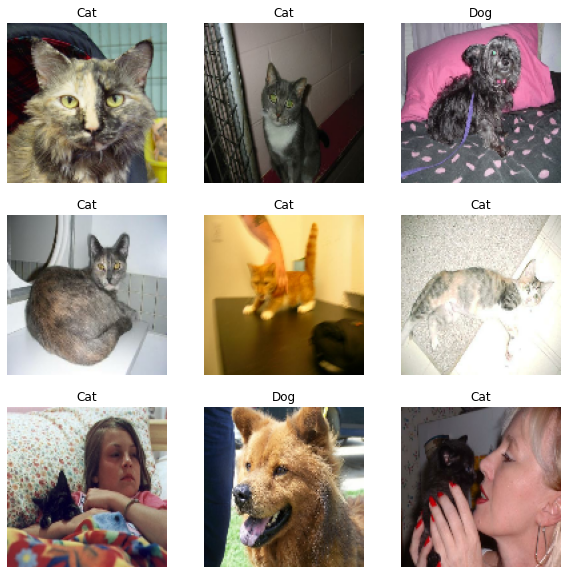

In [4]:
import matplotlib.pyplot as plt

class_names = ds_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Augmented Gambar

In [5]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    return image,y

In [6]:
ds_train = ds_train.map(augment)

Resize Gambar

Modelling

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
                    layers.Input((120,120,3)),
                    layers.Conv2D(16,3 ,padding ='same'),
                    layers.Conv2D(32,3, padding ='same'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(10),
])

model.compile(optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(ds_train,epochs=15,verbose=1)


Epoch 1/15
4/4 [==============================] - 2s 355ms/step - loss: 1552.6381 - accuracy: 0.3426
Epoch 2/15
4/4 [==============================] - 1s 330ms/step - loss: 1417.7000 - accuracy: 0.5093
Epoch 3/15
4/4 [==============================] - 1s 303ms/step - loss: 767.2052 - accuracy: 0.5370
Epoch 4/15
4/4 [==============================] - 1s 313ms/step - loss: 546.5743 - accuracy: 0.5000
Epoch 5/15
4/4 [==============================] - 1s 317ms/step - loss: 273.0211 - accuracy: 0.5463
Epoch 6/15
4/4 [==============================] - 2s 357ms/step - loss: 171.2092 - accuracy: 0.6667
Epoch 7/15
4/4 [==============================] - 1s 324ms/step - loss: 108.1215 - accuracy: 0.6852
Epoch 8/15
4/4 [==============================] - 1s 331ms/step - loss: 32.9647 - accuracy: 0.8426
Epoch 9/15
4/4 [==============================] - 1s 291ms/step - loss: 52.3926 - accuracy: 0.7222
Epoch 10/15
4/4 [==============================] - 1s 328ms/step - loss: 9.3381 - accuracy: 0.9352
E

### B. TFDS Datasets
tensorflow_datasets (TFDS) merupakan API yang sering digunakan untuk mengambil dataset dalam TensorFlow.

In [10]:
import tensorflow_datasets as tfds

- Numpy Array

In [11]:
import tensorflow as tf
import numpy
features = [1,2,3,4]
labels = [2,3,4,5]

dataset = tf.data.Dataset.from_tensor_slices((features,labels))

- CSV

In [12]:
import tensorflow as tf

filepath = "files/income_evaluation.csv"

label_col = "income"

dataset = tf.data.experimental.make_csv_dataset(
    filepath,
    batch_size =32
)

- TFDS 

In [13]:
data,info= tfds.load('mnist',split='train', shuffle_files=True, with_info=True)

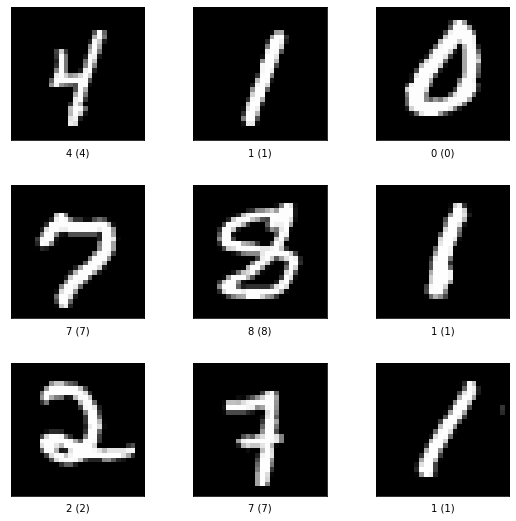

In [14]:
vis = tfds.visualization.show_examples(data, info)

# ETL
ETL adalah proses ektraksi, tranformasi, dan memuat data dari beberapa sumber ke data warehouse atau penyimpanan data terpadu.


## A. Extract
Ekstraksi adalah proses kita mengekstrak atau memuat suatu dataset kedalam projek. kita bisa mengekstrak data menggunakan tfds.load

In [15]:
dataset = list(tfds.list_builders())
for data in dataset:
    print(data)

abstract_reasoning
accentdb
aeslc
aflw2k3d
ag_news_subset
ai2_arc
ai2_arc_with_ir
amazon_us_reviews
anli
answer_equivalence
arc
asqa
asset
assin2
bair_robot_pushing_small
bccd
beans
bee_dataset
beir
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
ble_wind_field
blimp
booksum
bool_q
bucc
c4
caltech101
caltech_birds2010
caltech_birds2011
cardiotox
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
cfq
cherry_blossoms
chexpert
cifar10
cifar100
cifar100_n
cifar10_1
cifar10_corrupted
cifar10_n
citrus_leaves
cityscapes
civil_comments
clevr
clic
clinc_oos
cmaterdb
cnn_dailymail
coco
coco_captions
coil100
colorectal_histology
colorectal_histology_large
common_voice
conll2003
controlled_noisy_web_labels
coqa
cos_e
cosmos_qa
covid19
covid19sum
crema_d
criteo
cs_restaurants
curated_breast_imaging_ddsm
cycle_gan
d4rl_adroit_door
d4rl_adroit_hammer
d4rl_adroit_pen
d4rl_adroit_relocate
d4rl_antmaze
d4rl_mujoco_ant
d4rl_mujoco_halfcheetah
d4rl_mujoco_hopper
d4rl_mujoco_walker2d
dart
d

In [16]:
data,info= tfds.load('beans',split='train+test', shuffle_files=True, with_info=True,as_supervised=True)

Lihat informasi dataset

In [17]:
print("Datasets : ", info.name)
print("Image Feature : ", info.features['image'])
print("Label Features : ", info.features["label"])
print("Jumlah data training : ", info.splits["train"].num_examples)
print("Jumlah data testing : ", info.splits["test"].num_examples)

Datasets :  beans
Image Feature :  Image(shape=(500, 500, 3), dtype=tf.uint8)
Label Features :  ClassLabel(shape=(), dtype=tf.int64, num_classes=3)
Jumlah data training :  1034
Jumlah data testing :  128


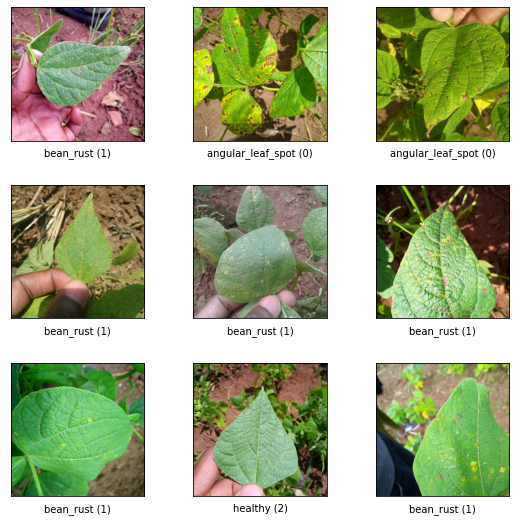

In [ ]:
vis = tfds.visualization.show_examples(data, info)

## B. Transform
Transformasi berguna untuk mengubah, memanipuliasi, atau mentransformasikan dataset sebelum digunakan kedalam model.

- Resize

In [ ]:
def resize(image,label):
  image = tf.image.resize(image,[224,224])
  return (image,label)

data = data.map(resize)

- Normalisasi

In [ ]:
data = data.map(lambda x,y: (x / 255,y))

- Shuffle

In [ ]:
data = data.shuffle(len(data))

- Batch

In [ ]:
data = data.batch(32)

- One Hot

In [ ]:
def one_hot(image, label):
    label = tf.one_hot(tf.cast(label, tf.int32), 3)
    # Recasts it to Float32
    label = tf.cast(label, tf.float32)
    return image, label

data = data.map(one_hot)

## C. Load

In [ ]:
my_model = tf.keras.models.Sequential(layers = [
                                     tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D((4,4)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Dense(256,activation='relu'),
                                     tf.keras.layers.Dense(3,activation='softmax')
],
name='ConvModel')

# Using the Categorical loss, and ADAM Optimizer
my_model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

Epoch 1/10
37/37 [==============================] - 41s 1s/step - loss: 1.4496 - accuracy: 0.6067
Epoch 2/10
37/37 [==============================] - 37s 965ms/step - loss: 0.6195 - accuracy: 0.7461
Epoch 3/10
37/37 [==============================] - 38s 998ms/step - loss: 0.3047 - accuracy: 0.8993
Epoch 4/10
37/37 [==============================] - 39s 1s/step - loss: 0.1897 - accuracy: 0.9363
Epoch 5/10
37/37 [==============================] - 35s 919ms/step - loss: 0.1305 - accuracy: 0.9604
Epoch 6/10
37/37 [==============================] - 38s 1s/step - loss: 0.0727 - accuracy: 0.9750
Epoch 7/10
37/37 [==============================] - 38s 981ms/step - loss: 0.0649 - accuracy: 0.9811
Epoch 8/10
37/37 [==============================] - 35s 927ms/step - loss: 0.0491 - accuracy: 0.9880
Epoch 9/10
37/37 [==============================] - 36s 933ms/step - loss: 0.0264 - accuracy: 0.9931
Epoch 10/10
37/37 [==============================] - 36s 936ms/step - loss: 0.0222 - accuracy: 0.994

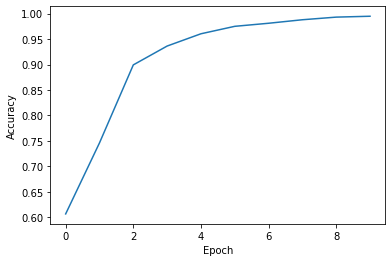

In [ ]:
History = my_model.fit(data,epochs=10)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
alpha = plt.plot(History.history['accuracy'])